You may need to close Figure 1 window to continue...


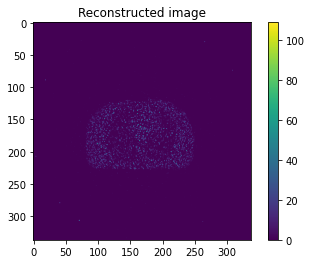

In [14]:
import sirf.STIR as pet
from sirf.Utilities import show_2D_array

template = pet.AcquisitionData("2D_dataset/template2D.hs")

image = template.create_uniform_image(1.0)

reconstruction = pet.OSMAPOSLReconstructor(filename='2D_dataset/OSEM2D.par')
reconstruction.set_up(image)
reconstruction.set_current_estimate(image)
reconstruction.process()

image_array = reconstruction.get_output().as_array()
show_2D_array('Reconstructed image', image_array[0,:,:])

You may need to close Figure 1 window to continue...


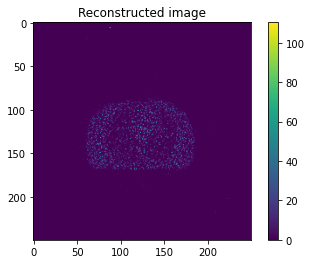

In [18]:
import sirf.STIR as pet
from sirf.Utilities import show_2D_array
           
prompts = pet.AcquisitionData("2D_dataset/my_Prompts2d.hs")
template = pet.AcquisitionData("2D_dataset/template2D.hs")
prompts.set_storage_scheme("memory")
additive_factors = pet.AcquisitionData("2D_dataset/my_total_additive_52d.hs")
multiplicative_factors = pet.AcquisitionData("2D_dataset/my_multfactors2d.hs")

normalisation_model = pet.AcquisitionSensitivityModel(multiplicative_factors)
normalisation_model.set_up(template)
sensitivity_vals = template.get_uniform_copy(1.0)
normalisation_model.normalise(sensitivity_vals)
sensitivity_factors = pet.AcquisitionSensitivityModel(sensitivity_vals)
sensitivity_factors.set_up(template)

image = template.create_uniform_image(1.0,251)

acquisition_model = pet.AcquisitionModelUsingRayTracingMatrix()
acquisition_model.set_num_tangential_LORs(10)
acquisition_model.set_up(template,image)
acquisition_model.set_additive_term(additive_factors)
acquisition_model.set_acquisition_sensitivity(sensitivity_factors)

objective_functional = pet.make_Poisson_loglikelihood(prompts, acq_model=acquisition_model)
objective_functional.set_recompute_sensitivity(1)

# create the reconstruction object
sirf_reconstruction = pet.OSMAPOSLReconstructor()
sirf_reconstruction.set_objective_function(objective_functional)
num_subsets = 4
num_subiterations = 100
sirf_reconstruction.set_num_subsets(num_subsets)
sirf_reconstruction.set_num_subiterations(num_subiterations)

sirf_reconstruction.set_up(image)
sirf_reconstruction.set_current_estimate(image)
sirf_reconstruction.process()

sirf_image_array = sirf_reconstruction.get_output().as_array()
show_2D_array('Reconstructed image', sirf_image_array[0,:,:])

1.0
87076.0
3157.1172
You may need to close Figure 1 window to continue...


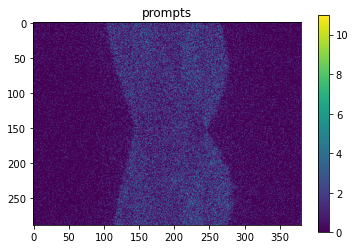

You may need to close Figure 1 window to continue...


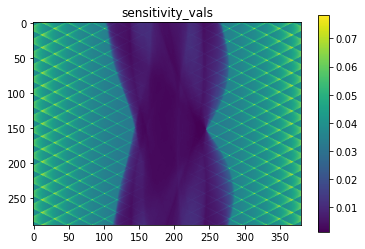

You may need to close Figure 1 window to continue...


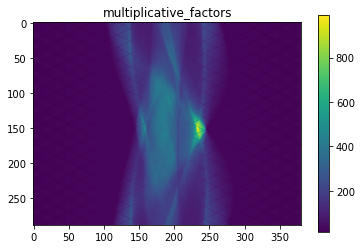

In [16]:
import numpy as np
print(np.linalg.norm(sirf_image_array)/np.linalg.norm(image_array))
print(prompts.as_array().ravel().sum())
print(sensitivity_vals.as_array().ravel().sum())
show_2D_array('prompts', prompts.as_array()[0,0,:,:])
show_2D_array('sensitivity_vals', sensitivity_vals.as_array()[0,0,:,:])
show_2D_array('multiplicative_factors', multiplicative_factors.as_array()[0,0,:,:])

In [17]:
""" from sirf.Utilities import show_2D_array, check_status
import sirf.pyiutilities as pyiutil
import sirf.pystir as pystir
import sirf.STIR as pet
import sirf.STIR_params as parms

class RDPrior(pet.Prior):
    """ r
    TODO: change description
    
    Class for the prior that is a quadratic function of the image values.

    Implements a quadratic Gibbs prior.

    The gradient of the prior for the image lambda is computed at voxel r as
    the sum of

        delta(r, s) = w(s - r)*kappa(r)*kappa(s)*(lambda(r) - lambda(s))

    over all voxels s where the weight w(s - r) is non-zero, kappa being an
    image used to have spatially-varying penalties such as in Jeff Fessler's
    papers.It should have identical dimensions to the image for which the
    penalty is computed. If kappa is not set, this class will
    effectively use 1 for all kappa's.

    By default, a 3x3 or 3x3x3 neigbourhood is used where the weights are set
    to x-voxel_size divided by the Euclidean distance between the points.
    """

    def __init__(self):
        """ init. """
        self.handle = None
        self.name = 'PriorWithParabolic'
        self.handle = pystir.cSTIR_newObject(self.name)
        check_status(self.handle)

    def __del__(self):
        """del."""
        if self.handle is not None:
            pyiutil.deleteDataHandle(self.handle)

    def get_epsilon(self):
        """Returns the penalty factor in front of the prior."""
        return parms.float_par(
            self.handle, 'RelativeDifferencePrior', 'epsilon')

    def set_epsilon(self, eps):
        """Sets epsilon."""
        parms.set_float_par(self.handle, 'RelativeDifferencePrior', 'epsilon', eps)
    
    def get_gamma(self):
        """Returns the penalty factor in front of the prior."""
        return parms.float_par(
            self.handle, 'RelativeDifferencePrior', 'gamma')

    def set_gamma(self, gamma):
        """Sets gamma."""
        parms.set_float_par(self.handle, 'RelativeDifferencePrior', 'gamma', gamma) """

SyntaxError: invalid syntax (<ipython-input-17-490111a2c6c3>, line 8)